# Kernalization
Please watch before proceed [Machine Learning Lecture 22 "More on Kernels" -Cornell CS4780 SP17](https://www.youtube.com/watch?v=FgTQG2IozlM&list=PLl8OlHZGYOQ7bkVbuRthEsaLr7bONzbXS&index=22)


In this tutorial, we will learn

1. What is a kernel function, kernel matrix ?
2. Some Kernel functions: linear, polynomial, rbf, exponential, and laplacian
3. How can we kernalize linear regression ?
4. How can we kernalize Support Vector Machine?

### What does kernalizing a linear model means ?
In a nutshell, if you are a linear model, then kernalizing you means that

$$ \text{You are the weighted sum of your experiences} $$

### Setup

$$ \mathcal D = \{(x_i,y_i) \}_{i=1} ^n $$


$$ \mathcal D \sim \mathbb P(\mathcal X, \mathcal Y)$$




$$ k: \mathcal{X} \times \mathcal{X} \rightarrow \mathbb{R}$$

**kernel function**. $$ k(x,x^{'}) = < \Phi(x), \Phi(x^{'}) >$$ where $\Phi$ maps into some dot product space $\mathcal{H}$, that is also called the $\textit{feature space}$. $k$ and $\Phi$ are called a kernel and its feature map. 



### Some properties of a kernel function 

#### 1. Gram matrix
Given a kernel $k$ and inputs $x_1 , \dots , x_n \in \mathcal{X}$, the  $ n \times n $ matrix is called the Gram matrix

$$ K:= ( k (x_i,x_j))_{ij} $$



#### 2. Positive Definite Matrix.
A real $ n \times n $ symmetric matrix $K_{ij}$ satisfiying

$$ \Sigma_{i,j} c_i c_j K_{ij} \geq 0$$ for all $c_i \in \mathbb{R}$ is called positive definite.


For many others we refer [1,2].

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs

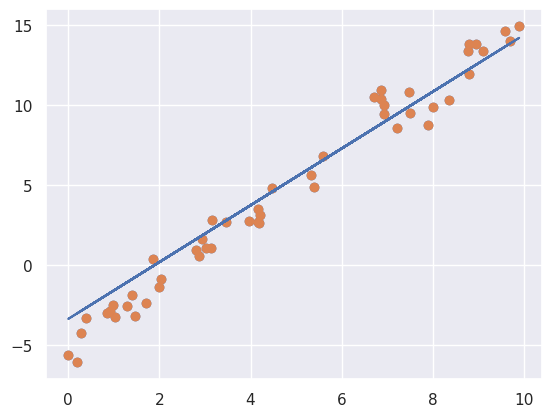

In [2]:
class LinearReg:
    def __init__(self,print_loss=False):
        self.lr=.001
        self.epoch=5000
        self.print_loss=print_loss
        self.reg=.5
        pass
    def fit(self,X,y):        
        self.w=np.random.randn(1)
        self.b=np.random.randn(1)
        for i in range(self.epoch):
            pred=X*self.w+self.b
            # Error with clipping 
            error=np.clip(y-pred, -10, 10)
            
            # (y-(Xw)**2
            sqrt_loss=((error)**2).mean() + self.reg*(self.w**2 + self.b**2)

            dpred= 2*error
            dw=-(dpred *X).mean() + .5 * self.reg*self.w
            db=-dpred.mean() + .5 * self.reg*self.b
        
            self.w -= self.lr*dw
            self.b -= self.lr*db
            
            if i %(self.epoch//10)==0:
                if self.print_loss:
                    print(sqrt_loss)

        return self
    def predict(self,X):
        return X*self.w+self.b

    
rng = np.random.RandomState(1)
X = 10 * rng.rand(50)
Y = 2 * X - 5 + rng.randn(50)
plt.scatter(X, Y)

lr=LinearReg().fit(X,Y)
plt.scatter(X, Y)
plt.plot(X, lr.predict(X))

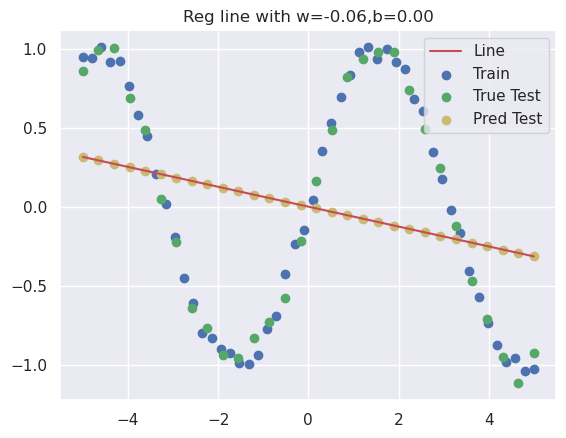

In [3]:

## Define a true function 
def f(x):
    return np.sin(x)#+(x/25)**2

def generate_input(n):
    return np.linspace(-5, 5, num=n)

N = 50    # number of training points.
n = 30     # number of testing points.
s = 0.05    # noise variance.

#X = np.arange(N)#.reshape(N,1)
#X = N * rng.rand(N)

X = generate_input(N)
Y = f(X)+s*np.random.randn(N)


Xtest= generate_input(n)
Ytest= f(Xtest) +s*np.random.randn(n)

lr=LinearReg().fit(X,Y)
plt.scatter(X, Y,label='Train')
plt.plot(X, lr.predict(X),c='r',label='Line')
plt.scatter(Xtest, Ytest,c='g',label='True Test')
plt.scatter(Xtest, lr.predict(Xtest),c='y',label='Pred Test')
plt.title(f'Reg line with w={lr.w[0]:.2f},b={lr.b[0]:.2f}')
plt.legend();

# Kernels

#### SETUP: Linear Regression, Squared Loss

$$ \mathcal L (w) = \sum_i ^n (w^T x_i- y_i)^2$$


$$ \frac{\partial \mathcal L}{\partial w}= \sum_i ^n 2(w^T x_i- y_i) x_i$$

## Proof By Induction

$$ w = \sum_i ^n \alpha_i x_i$$


$$ w^{t+1} = w^t - lr  \sum_i ^n 2(w^{t} x_i- y_i) x_i $$


### 1.  $$\alpha^{0}=[ 0 ]^n \\  w^0 = \sum_i ^n \alpha_i ^0 x_i \\ \forall i \; \alpha_i ^0 =0 \wedge w^0=0$$


### 2. $$ w_1 = \sum_i ^n \alpha_i ^0 x_i - lr \sum_i ^n 2 \Big( \big (\sum_j ^n \alpha_j ^0 x_j x_i \big ) - y_i\Big)x_i$$



# Kernalized Squared Loss


### 1.$$ \mathcal L (\alpha) = \sum_i ^n \Big( \big(\sum_j ^n \alpha_j (x_j x_i) \big)- y_i \Big)^2$$

### 2. $$ \mathcal L (\alpha) = \sum_i ^n \Big( \big(\sum_j ^n \alpha_j K_{ji} \big)- y_i \Big)^2$$



### 3. $$ \mathcal L (\alpha) = \sum_i ^n \Big( p_i - y_i \Big)^2$$
where $$ p_i=\big(\sum_j ^n \alpha_j K_{ji} \big)$$

### 3. $$ \frac{\partial \mathcal L}{ \partial \alpha } = 2*\Big( \big(\sum_j ^n \alpha_j K_{ji} \big)- y_i \Big) * \big(\sum_j ^n K_{ji} \big) $$


In [4]:

def rbf(x,z,sigma=.05,mu=0):
    return np.exp(-0.5 * ( 1/np.power(sigma,2) ) * ( np.power((x-z)-mu,2)))


def polynomial_kernel(x,y,d=3):
    return (1+np.sum(x*y))**d

def exponential_kernel(a,b,sigma=.2,mu=0):
    x=a-b
    return np.exp(-0.5 * ( 1/(2*np.power(sigma,2)) ) * ( np.power(x-mu,2)))

def laplacian_kernel(a,b,sigma=.2,mu=0):
    x=a-b
    return np.exp(-0.5 * ( 1/(2*np.power(sigma,2)) ) * ( np.abs(x-mu)))

In [5]:
class KernelLinearRegression:
    def __init__(self,reg=1,sigma=1,mu=0,print_loss=False):
        self.lr=.01
        self.reg=reg
        self.epoch=1_000
        self.print_loss=print_loss
        self.sigma=sigma
        self.mu=mu

    def create_kernel_matrix(self):
        gram_matrix=[]
        for i in range(len(self.X)):
            gram_matrix.append(self.kernel(self.X[i],X,sigma=self.sigma,mu=self.mu))
        return np.array(gram_matrix)

    def fit(self,X,y,kernel):        
        self.X=X
        self.Y=y
        self.kernel=kernel
        self.alpha=np.random.randn(len(self.X))
        
        self.K=self.create_kernel_matrix()
        
        n=len(X)
        for e in range(self.epoch):
            epoch_sqrt_loss=0
            epoch_dalpha=np.zeros(self.alpha.shape)
            for i in range(len(X)):
                pred=np.sum(self.alpha*self.K[i,:])
                err=pred-self.Y[i]
                
                cost=err**2
                epoch_sqrt_loss+=cost
                
                # Derivative w.r.t. prediction
                dpred=2*err
                # Derivative w.r.t. alpha
                dalpha=dpred * self.K[i,:]
                # Average gradients.
                #dalpha/=n
                dalpha/=n
                epoch_dalpha+=dalpha


            epoch_sqrt_loss+=self.reg*np.sum(self.alpha**2)
            
            self.alpha-=(self.lr*epoch_dalpha) + self.lr*self.reg*(2*self.alpha)
                
            avg_loss=epoch_sqrt_loss/n
            if avg_loss<0.001:
                print(f'Iteration:{e}\t Average loss:{avg_loss:.3f}')
                break
            if e %(self.epoch//10)==0:
                if self.print_loss:
                    print(f'Iteration:{e}\t Average loss:{avg_loss:.3f}')
        return self
    def predict(self,X):
        preds=[]
        for j in range(len(X)):
            preds.append(np.sum(self.alpha*self.K[j,:]))
        return np.array(preds)  
    
    def plot(self,X,Y):
        plt.scatter(X, Y,label='Train')
        plt.plot(X, self.predict(X),c='r',label='Line')
        plt.legend()
        plt.title(f'Kernel Regresion sigma:{self.sigma}, reg:{self.reg}')
        plt.show()

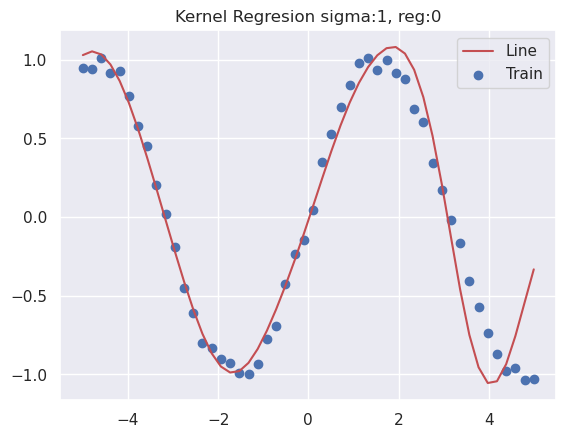

In [6]:
KernelLinearRegression(sigma=1,reg=0).fit(X,Y,kernel=rbf).plot(X,Y)

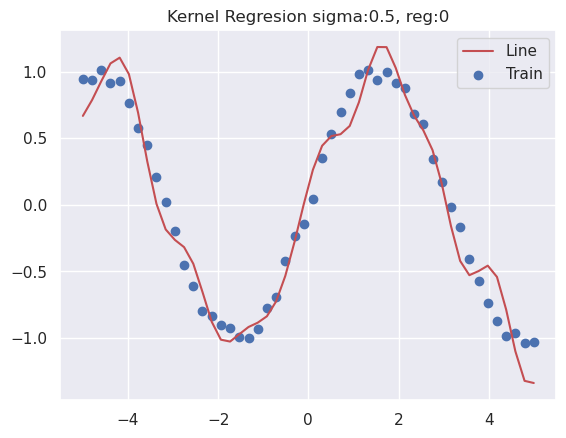

In [7]:
KernelLinearRegression(sigma=.5,reg=0).fit(X,Y,kernel=rbf).plot(X,Y)

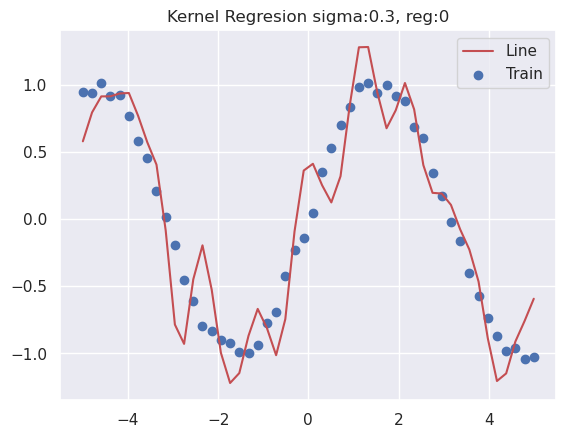

In [8]:
KernelLinearRegression(sigma=.3,reg=0).fit(X,Y,kernel=rbf).plot(X,Y)

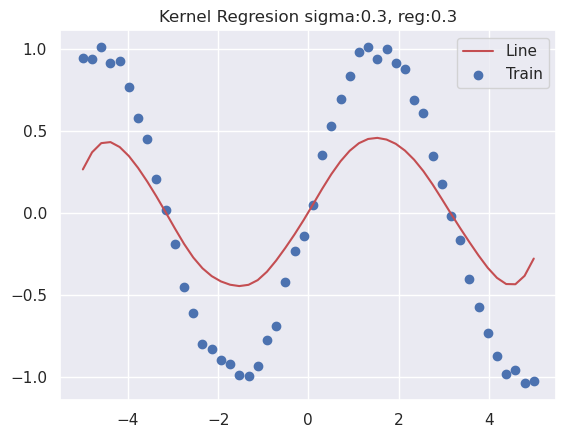

In [9]:
KernelLinearRegression(sigma=.3,reg=0.3).fit(X,Y,kernel=rbf).plot(X,Y)

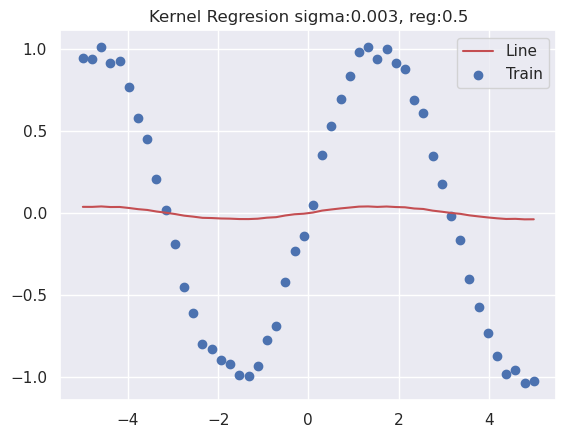

In [10]:
KernelLinearRegression(sigma=.003,reg=.5).fit(X,Y,kernel=rbf).plot(X,Y)

__Kernels are "magical", aren't they ?__

# Support Vector Machine

## SVM Loss

$$argmin_{w,b} \; w^T w $$
$$ s.t.$$
$$ \forall (x_i,y_i) \in \mathcal D : y_i (w^T x_i +b) \ge 1$$



## SVM Loss with Slack Variable

$C$ is a hyperparameter
$$argmin_{w,b} \; w^T w \sum_i ^n + \; C \sum_i ^n \xi_i$$
$$ s.t.$$
$$ \forall (x_i,y_i) \in \mathcal D : y_i (w^T x_i +b) \ge 1 - \xi_i\\
\forall i \; \xi_i \ge 0
$$

# SVM loss as Hinge loss with l2 norm


$$ \mathcal L (w) = w^T w + C \sum_i max(1-y_i(w^T x_i + b),0)$$



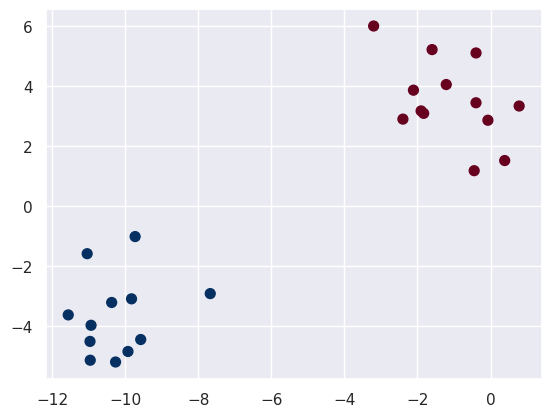

In [11]:
X, y = make_blobs(25, 2, centers=2, random_state=1, cluster_std=1.4)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='RdBu');

In [12]:
class SVM:
    def __init__(self,margin=1,C=1,lr=.0001,iteration=10**4):
        self.margin=margin
        self.C=C
        self.lr=lr
        self.w=None
        self.iteration=iteration
        
    def compute_hinge_loss(self):
        """ Compute Cost of slack variables """
        z=self.y*(self.X@self.w)
        hinge_loss=np.maximum(self.margin-z,0)
        idx=np.where(hinge_loss > 0)
        dh_loss=-self.y[idx].T@self.X[idx]
        return hinge_loss,dh_loss
    
    def svm_loss(self):
        # (1) Compute the hingle loss
        hinge_loss, dhinge_loss=self.compute_hinge_loss()
        # (2) Compute SVM loss: Hinge Loss + l2
        svm_loss=np.sum(self.w**2)+ self.C*hinge_loss.sum()        
        # (3) Compute the average the gradient of hinge loss
        dhinge_loss/=self.n
        dhinge_loss*=self.C
        # (4) Compute gradient of regularization
        dl2=2*self.w
        # (5) Compute derivative of the loss w.r.t. w.
        dw=dhinge_loss+dl2
        return svm_loss, dw
    
    def fit(self,X,y):
        # (1) Add ones to input.
        self.X=np.hstack((X,np.ones((len(X),1))))
        # (2) Add bias into weights.
        self.w=np.random.randn(self.X.shape[1])
        self.y=y
        # (3) number of data points.
        self.n=len(self.X)
        # Convert 0 to -1.
        y[y==0]=-1
        
        for i in range(self.iteration):
            #(4) Compute SVM loss and Compute derivative of loss w.r.t. w.
            svm_loss,dw=self.svm_loss()
            # (5) Update w in the negative direction of derivative.
            self.w-=self.lr*dw    
            # Gradient Cliping
            #self.w=np.clip(self.w, -5**2, 5**2)

            if i %(self.iteration//20)==0:
                print(f'Loss:{svm_loss:.5} ||W||={np.sqrt(self.w**2)[0]:.3f}, Acc:{(y==self.predict(X)).mean()}')
                
                if svm_loss==0:
                    print('ZERO loss')
                    break
        return self
    
    def decision_function(self,X):
        X=np.hstack((X,np.ones((len(X),1))))
        return X@self.w
    
    def predict(self,X):
        pred=(self.decision_function(X)>0)*1
        pred[pred==0]=-1
        return pred
    
    
    def plot_decision_boundary(self,X,y,plot_support_vector=False):
        fig, ax = plt.subplots()
        ax.scatter(X[:, 0], X[:, 1], c=y, s=50,cmap='RdBu')
        ax.set_title(f'SVM with C:{self.C}', size=14)
        
        xx_min,xy_min=X.min(axis=0)
        xx_max,xy_max=X.max(axis=0)

        # Visualization works perfectly
        xlim,ylim = (xx_min-1, xx_max+1), (xy_min-1, xy_max+1)
        xg = np.linspace(xlim[0], xlim[1], 60)
        yg = np.linspace(ylim[0], ylim[1], 40)
        xx, yy = np.meshgrid(xg, yg)
        Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T
        for label, color in enumerate(['red', 'blue']):
            Pm=self.decision_function(Xgrid)
            c=ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,cmap=color.title() + 's')
            ax.contour(xx, yy, Pm.reshape(xx.shape),levels=[-self.margin,0,self.margin],
                       colors=color,linestyles=['--', '-', '--'],alpha=0.2)
        fig.colorbar(c, ax=ax)
        ax.set(xlim=xlim, ylim=ylim)

        if plot_support_vector:
        
            P=self.decision_function(X)
            self.support_vectors_=X[(np.where((P <1.1) & (P >-1.1)))]
        
            plt.scatter(self.support_vectors_[:, 0],self.support_vectors_[:, 1],s=300, linewidth=2, facecolors='g',label='Support Vectors');

            pred=self.decision_function(X)
            for i in range(len(X)):
                if -1.1<pred[i]<1.1:
                    plt.annotate(f'  {pred[i]:.3},{y[i]}',xy=(X[i]))
            plt.legend()
        plt.show()

Loss:2085.7 ||W||=0.463, Acc:0.48
Loss:0.71245 ||W||=0.160, Acc:1.0
Loss:0.66817 ||W||=0.155, Acc:1.0
Loss:0.62816 ||W||=0.148, Acc:1.0
Loss:0.63785 ||W||=0.143, Acc:1.0
Loss:0.57249 ||W||=0.137, Acc:1.0
Loss:0.56281 ||W||=0.133, Acc:1.0
Loss:0.53554 ||W||=0.128, Acc:1.0
Loss:0.52115 ||W||=0.124, Acc:1.0
Loss:0.51046 ||W||=0.121, Acc:1.0
Loss:0.50944 ||W||=0.117, Acc:1.0
Loss:0.50321 ||W||=0.116, Acc:1.0
Loss:0.48718 ||W||=0.112, Acc:1.0
Loss:0.48267 ||W||=0.111, Acc:1.0
Loss:0.48468 ||W||=0.108, Acc:1.0
Loss:0.4826 ||W||=0.107, Acc:1.0
Loss:0.472 ||W||=0.105, Acc:1.0
Loss:0.47028 ||W||=0.104, Acc:1.0
Loss:0.47253 ||W||=0.102, Acc:1.0
Loss:0.47231 ||W||=0.101, Acc:1.0


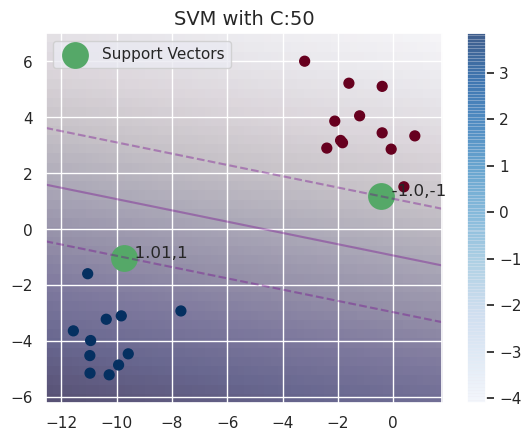

In [13]:
svm=SVM(C=50).fit(X,y)
svm.plot_decision_boundary(X,y,plot_support_vector=True)

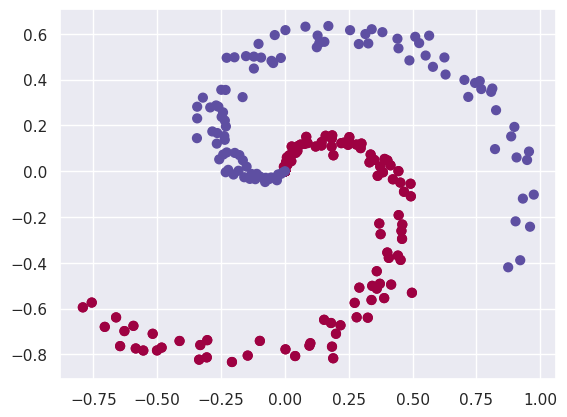

Loss:1.327 ||W||=0.251, Acc:0.5
Loss:1.1166 ||W||=0.227, Acc:0.5
Loss:0.94185 ||W||=0.206, Acc:0.5
Loss:0.79649 ||W||=0.186, Acc:0.5
Loss:0.6754 ||W||=0.168, Acc:0.5
Loss:0.57438 ||W||=0.152, Acc:0.5
Loss:0.48998 ||W||=0.138, Acc:0.5
Loss:0.41933 ||W||=0.124, Acc:0.5
Loss:0.36011 ||W||=0.112, Acc:0.5
Loss:0.31036 ||W||=0.102, Acc:0.5
Loss:0.26849 ||W||=0.092, Acc:0.5
Loss:0.23318 ||W||=0.083, Acc:0.5
Loss:0.20334 ||W||=0.075, Acc:0.5
Loss:0.17809 ||W||=0.068, Acc:0.5
Loss:0.15665 ||W||=0.061, Acc:0.5
Loss:0.13841 ||W||=0.055, Acc:0.5
Loss:0.12286 ||W||=0.050, Acc:0.5
Loss:0.10956 ||W||=0.045, Acc:0.5
Loss:0.098157 ||W||=0.041, Acc:0.5
Loss:0.088362 ||W||=0.037, Acc:0.5
Acc.: 0.5


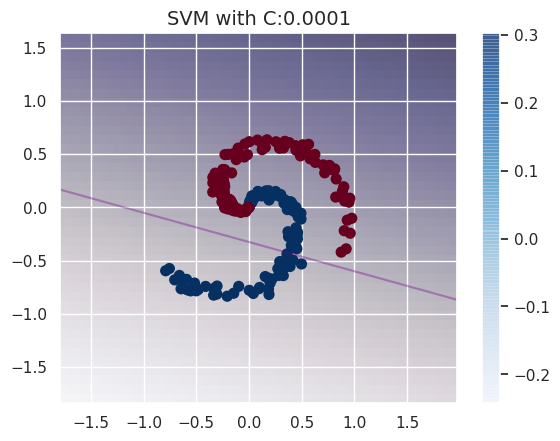

In [14]:
def spiral_data_gen():

    N = 100 # number of points per class
    D = 2 # dimensionality
    K = 2 # number of classes
    X = np.zeros((N*K,D)) # data matrix (each row = single example)
    y = np.zeros(N*K, dtype='uint8') # class labels
    for j in range(K):
        ix = range(N*j,N*(j+1))
        r = np.linspace(0.0,1,N) # radius
        t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j
        # lets visualize the data:
        plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.show()
    return X,y

X,y=spiral_data_gen()
svm=SVM(C=.0001).fit(X,y)
print('Acc.:',(y==svm.predict(X)).mean())
svm.plot_decision_boundary(X,y)

# Kernalized Support Vector Machine


### RECAP Linear SVM
$$ min_{w,b} \; \; w^T w + C \sum_{i=1} ^N \xi_i \\ s.t. \\
\forall \; i \; \; y_i (w^T x_i +b) \ge 1 - \xi_i \\ \xi_i \ge 0
$$


$$ \mathcal L (w) = w^T w + C \sum_i max(1-y_i(w^T x_i),0)$$

$$ min_{\alpha_1, \dots, \alpha_n} \frac{1}{2} \sum_{i,j} \alpha_i \alpha_j y_i y_j K_{ij} - \sum_{i=1} ^n \alpha_i \\ s.t. 0\le a_i <C \\ \sum_i ^n \alpha_i y_i = 0$$


The decision boundary becomes 
$$ h(x) = sign \big(\sum_i ^n \alpha_i y_i k(x_i,x) + b \big)$$

###  Kernalized SVM
$$ min_{w,b} \; \; w^T w + C \sum_{i=1} ^N \xi_i \\ s.t. \\
\forall \; i \; \; y_i (w^T x_i +b) \ge 1 - \xi_i \\ \xi_i \ge 0
$$


$$ \mathcal L (w) = w^T w + C \sum_i max(1-y_i(w^T \phi(x_i)+b),0)$$